In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("dba2.csv", header = None)

In [6]:
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
df.columns = ["Variance","Skewness","Kurtosis","Entropy","Class"]

In [8]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

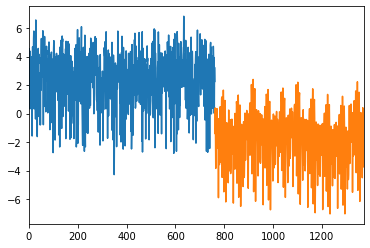

In [11]:
df.loc[df.Class == 0].Variance.plot()
df.loc[df.Class == 1].Variance.plot()

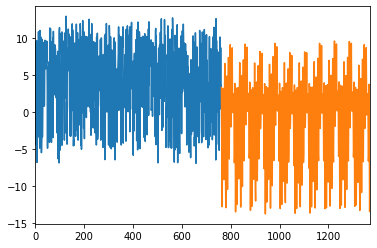

In [12]:
df.loc[df.Class == 0].Skewness.plot()
df.loc[df.Class == 1].Skewness.plot()

In [14]:
df.loc[df.Class == 0].Skewness.mean(),df.loc[df.Class == 1].Skewness.mean()


(4.256627188342784, -0.9935761245901634)

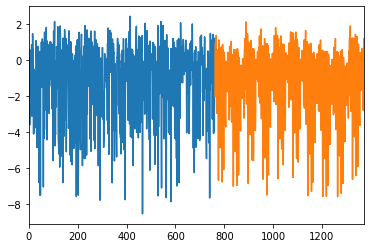

In [15]:
df.loc[df.Class == 0].Entropy.plot()
df.loc[df.Class == 1].Entropy.plot()

In [16]:
df.loc[df.Class == 0].Entropy.mean(),df.loc[df.Class == 1].Entropy.mean()


(-1.1476402762467195, -1.2466407459016389)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Kurtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [18]:
df.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


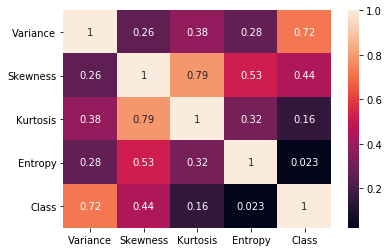

In [21]:
sns.heatmap(abs(df.corr()), annot = True)

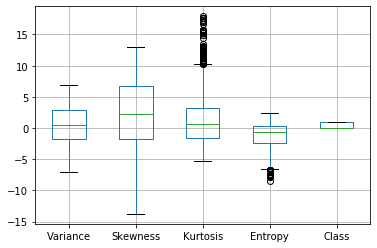

In [22]:
df.boxplot()

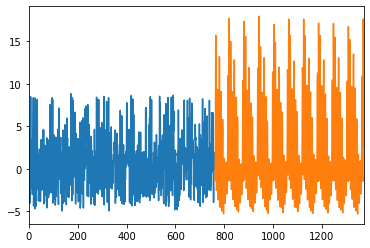

In [27]:
df.loc[df.Class == 0].Kurtosis.plot()
df.loc[df.Class == 1].Kurtosis.plot()

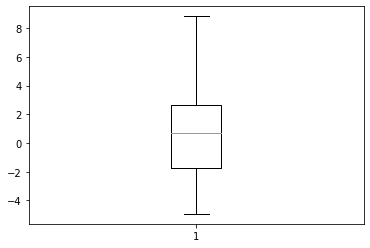

In [28]:
plt.boxplot(df.loc[df.Class ==0, "Kurtosis"])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["Class"]), df[["Class"]],train_size = 0.8)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
model = DecisionTreeClassifier()

In [36]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred = model.predict(x_test)

In [41]:
(y_pred == y_test.Class).mean()

0.9709090909090909

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test.Class, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       160
           1       0.97      0.96      0.96       115

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [46]:
print(confusion_matrix(y_test.Class, y_pred))

[[157   3]
 [  5 110]]


In [47]:
model.feature_importances_

array([0.58727554, 0.24143895, 0.13342071, 0.0378648 ])

In [51]:
df.columns[0:4]

Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy'], dtype='object')

In [52]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [53]:
!pip install dtreeviz


  Created wheel for dtreeviz: filename=dtreeviz-0.8.1-cp36-none-any.whl size=21790 sha256=5670b020f7e911aeb13752569d302772a3cfbd4e5ce59597829d4f826585ea03
  Stored in directory: /root/.cache/pip/wheels/d8/74/06/0d9d450156c7cb2f1fcfb51a55b1542d26f459f557d742c406
Successfully built dtreeviz


In [0]:
from dtreeviz.trees import *

In [59]:
viz = dtreeviz(model, x_train, y_train.Class, feature_names=x_train.columns, target_name="Class", class_names=[0,1])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [0]:
from IPython.core.display import display, HTML

In [61]:
display(HTML(viz.svg()))

In [62]:
viz.save_svg()

'/tmp/DTreeViz_122.svg'

### Decision Trees can further be enhanced by using 2 techniques - 

1. Boosting 
2. Bagging

In [0]:
# 1. Bagging - You randomly take columns and rows and you will make Decision Trees. In the end you will add up all the DT. 
# Example - Random Forest
# *adding trees means ensemble

In [0]:
# 2. Boosting - You make trees with random rows only, you try to optimize them by using some Gradient tech to increase accuracy. 
# Again you add up all your trees. 
# Example - GradientBoostedTrees, XGBoost 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model_2 = RandomForestClassifier(n_estimators=5, random_state=42)

In [0]:
from multiprocessing import cpu_count

In [69]:
cpu_count()

2

In [84]:
model_2.fit(x_train, y_train)
y_pred = model_2.predict(x_test)
(y_pred == y_test.Class).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9963636363636363

In [85]:
!pip install mlxtend 


In [0]:
import mlxtend

In [0]:
from mlxtend.plotting import plot_decision_regions

ValueError: ignored

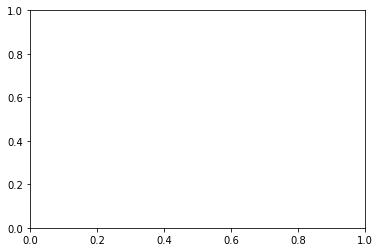

In [96]:
plot_decision_regions(x_test.values, y_test.Class.values, model_2, filler_feature_values={3: 0.45}, filler_feature_ranges={3: 0.75})